<a href="https://colab.research.google.com/github/PGM-Lab/probai-2021-pyro/blob/main/Day1/notebooks/students_PPLs_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TO AVOID KERNEL DYING WHEN PLOTTING (THIS IS A WINDOWS PARTICULAR PROBLEM)
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


# Setup
Let's begin by installing and importing the modules we'll need.

In [2]:
import pyro
import torch
import pyro.distributions as dist

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
pyro.set_rng_seed(54321)

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


# 1. **Pyro’s distributions** (http://docs.pyro.ai/en/stable/distributions.html) :


---
* Pyro provides a wide range of distributions: **Normal, Beta, Cauchy, Dirichlet, Gumbel, Poisson, Pareto, etc.**

---


In [4]:
normal = dist.Normal(0,1)
normal

Normal(loc: 0.0, scale: 1.0)


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

---

* Samples from the distributions are [Pytorch’s Tensor objects](https://pytorch.org/cppdocs/notes/tensor_creation.html) (i.e. multidimensional arrays).

---


In [5]:
sample = normal.sample()
sample

tensor(1.2985)

In [6]:
sample = normal.sample(sample_shape=[3,4,5])
sample

tensor([[[ 1.3817,  0.2901,  0.2039,  0.3566,  0.0718],
         [ 1.3118,  1.7772, -2.3350, -0.7147, -0.0890],
         [ 0.0943,  0.1565,  0.1327,  0.1029, -0.7578],
         [-0.8876, -1.9020,  1.0773,  0.8818,  1.1350]],

        [[-1.6388,  0.3047, -1.6548,  0.5395, -0.1161],
         [ 0.9802,  1.0666, -1.0025, -1.1953,  0.9164],
         [ 0.5790,  1.1531,  0.1992, -0.1125, -0.0122],
         [ 1.3886,  0.6613,  0.9493,  1.6604,  1.1526]],

        [[ 0.8295,  0.0373,  0.5971, -0.3813,  1.0189],
         [ 0.2999,  1.9245,  0.9334,  0.9733, -2.3288],
         [ 0.4354, -0.5345, -0.4033, -1.7434,  0.3953],
         [ 0.9475, -1.5764, -0.2744,  0.5723, -0.6118]]])

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

---
* We can query the **dimensionlity** of a tensor with the ``shape`` property

---

In [7]:
sample = normal.sample(sample_shape=[3,4,5])
sample.shape

torch.Size([3, 4, 5])


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


---
* Operations, like **log-likelihood**, are defined over tensors.

---



In [8]:
normal.log_prob(sample)

tensor([[[-1.5462, -1.3968, -0.9997, -1.0329, -1.2141],
         [-2.1080, -1.1056, -0.9544, -0.9655, -0.9196],
         [-0.9220, -1.7991, -1.4268, -1.5426, -0.9406],
         [-1.1145, -1.3309, -1.3404, -0.9592, -2.1837]],

        [[-1.2170, -0.9463, -2.2960, -3.4794, -2.2775],
         [-1.2553, -0.9337, -2.0889, -1.8116, -1.1554],
         [-1.8947, -1.0433, -2.0099, -1.1567, -3.1820],
         [-0.9303, -0.9457, -1.8317, -0.9589, -0.9381]],

        [[-1.3324, -2.8336, -2.1922, -1.6225, -1.2582],
         [-1.1087, -1.0353, -1.0933, -0.9200, -1.3021],
         [-0.9691, -1.1069, -0.9351, -1.3803, -0.9221],
         [-0.9473, -1.1623, -0.9217, -1.1652, -0.9524]]])

In [9]:
torch.sum(normal.log_prob(sample))

tensor(-83.3157)

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

---

* **Multiple distributions** can be embedded in single object.

* Below we define **three Normal distributions with different means but the same scale** in a single object.

---

In [10]:
normal = dist.Normal(torch.tensor([1.,2.,3.]),1.)
normal

Normal(loc: torch.Size([3]), scale: torch.Size([3]))

In [11]:
normal.sample()

tensor([1.3362, 3.0017, 3.7343])

In [12]:
normal.log_prob(normal.sample())

tensor([-2.2011, -0.9275, -1.1548])

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

### **<span style="color:red">Exercise: Open the notebook and play around</span>**

* Test that everything works.
* Play a bit with the code in Section 1 of the notebook.

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

# 2. **Pyro’s models** (http://pyro.ai/examples/intro_part_i.html) :

---
* In Pyro, a probabilistic model is defined as a **stochastic function** (i.e. every time it is run, it returns a new sample).

* Each random variable is associated with a **primitive stochastic function** using the construct ``pyro.sample(...)``.
---


### 2.1 A Temperature Model



As initial running example, we consider the problem of **modelling the temperature**. We first start with a simple model where temperture is modeled using a random Normal variable.

In [13]:
# the function `model` is a stochastic function (its returned value is non-deterministic)
# `temp` is a primitive stochastic function (uses pyro.sample)
def model():
    # `temp` is a tensor whose value is a random sample
    # from a Normal(15.0, 2.0) distribution
    temp = pyro.sample('temp', dist.Normal(15.0, 2.0))
    return temp

print(model())
print(model())

tensor(16.2619)
tensor(14.6151)


See how the model is a stochastic function which **returns a different value everytime it is invoked**. 

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


### 2.2 A Temperature-Sensor Model

---
* In Pyro, a stochastic method is defined as a **composition of primitive stochastic functions**.
* The temperature Model: we consider the presence of a **temperature sensor**. 
  * The temperature sensor gives **noisy observations** about the real temperature.
  * The **error** of the sensor's measurements **is known**.
  * A graphical representation of this model:

<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/PGM-Tem-Sensor.png?raw=1" alt="Drawing" width="150">
</center>
---


In [14]:
# Again `model` is a stochastic function
# `temp` a primitive stochastic function
# `sensor` is a stochastic method (composition of primitive stochastic functions)
def model():
    temp = pyro.sample('temp', dist.Normal(15.0, 2.0))
    sensor = pyro.sample('sensor', dist.Normal(temp, 1.0))
    return (temp, sensor)

out1 = model()
out1

(tensor(19.9873), tensor(19.0439))

---
* The above method defines a joint probability distribution:
$$p(sensor, temp) = p(sensor|temp)p(temp)$$




* In this case, we have a simple dependency between the variables. But, as we are in a PPL, dependencies can be expressed in terms of complex deterministic functions (more examples later).

---

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


# 3. **Pyro’s inference** (http://pyro.ai/examples/intro_part_ii.html) :

### Auxiliary inference functions (more details on Day 3)

To make inference on Pyro, we will use a **variational inference** method, which performs gradient-based optimization to solve the inference problem. More details will be given on Day 3. 

In [15]:
from torch.distributions import constraints
from pyro.optim import SGD
from pyro.infer import Trace_ELBO
import matplotlib.pyplot as plt
from pyro.contrib.autoguide import AutoDiagonalNormal

# Notice that there's no return statement
def svi(temperature_model, guide, obs, num_steps = 5000, plot = False):
    pyro.clear_param_store()
    svi = pyro.infer.SVI(model = temperature_model,
                         guide = guide,
                         optim = SGD({"lr": 0.001, "momentum":0.1}),
                         loss = Trace_ELBO())

    losses, a,b  = [], [], []
    
    for t in range(num_steps):
        losses.append(svi.step(obs))
        if t % 250 == 0:
            print('Step: ' + str(t) + '. Loss: ' + str(losses[-1]))
            

    if (plot):
        plt.plot(losses)
        plt.title("ELBO")
        plt.xlabel("step")
        plt.ylabel("loss");
        plt.show()

---
* To make inference in Pyro over a given model we need to define a **guide**, this **guide** has the **same signature** than its counterpart model. 

* The guide must provide **samples for those variables of the model which are not observed** using again the ``pyro.sample`` construct. 

* Guides are also parametrized using Pyro's parameters (``pyro.param``), so the variational inference algorithm will optimize these parameters. 

* All of that will be explained in detail on Day 3.

---

In [16]:
#The guide (NOTICE THAT THERE'S NO RETURN STATEMENT)
def guide(obs):
    a = pyro.param("mean", torch.tensor(0.0))
    b = pyro.param("scale", torch.tensor(1.), constraint=constraints.positive)
    #This represents a parametrized version of the posterior distribution for `temp`
    # `a` and `b` are learnable parameters
    temp = pyro.sample('temp', dist.Normal(a, b))

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

### 3.1  Conditioning on a single observation

Now, we continue with the last model defined in section 2.2, and assume we have a sensor reading and we want to compute the **posterior distribution** over the real temperature. 
<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/PGM-Tem-Sensor.png?raw=1" alt="Drawing" width="150">
</center>

---
* This can be achived by introducing **observations in the random variable** with the keyword ``obs=``.

---

In [17]:
#The observatons   
obs = {'sensor': torch.tensor(18.0)}

# Notice that `model` and `guide` have the same signature specified in the above paragraph.
# `model` has not return statement
def model(obs):
    # For `temp`, notice the match of the name in the guide and the model
    # Here `temp` represents a relization from the prior distribution of the temperature
    temp = pyro.sample('temp', dist.Normal(15.0, 2.0))
    sensor = pyro.sample('sensor', dist.Normal(temp, 1.0), obs = obs['sensor'])

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


---
* Inference is made using the previously defined auxiliary functions, ``svi`` and ``guide``. 

* We can query the **posterior probability distribution**: 


$$p(temp | sensor=18)=\frac{p(sensor=18|temp)p(temp)}{\int p(sensor=18|temp)p(temp) dtemp}$$

---

Step: 0. Loss: 238.07669878005981
Step: 250. Loss: 115.40528988838196
Step: 500. Loss: 57.74627113342285
Step: 750. Loss: 34.10185730457306
Step: 1000. Loss: 10.580311059951782
Step: 1250. Loss: 11.710634589195251
Step: 1500. Loss: 8.654770731925964
Step: 1750. Loss: 3.545927047729492
Step: 2000. Loss: 2.1728129386901855
Step: 2250. Loss: 1.545773983001709
Step: 2500. Loss: 2.743692457675934
Step: 2750. Loss: 2.7941551208496094
Step: 3000. Loss: 2.96124267578125
Step: 3250. Loss: 2.6138097047805786
Step: 3500. Loss: 2.465648829936981
Step: 3750. Loss: 2.2760543823242188
Step: 4000. Loss: 2.637632191181183
Step: 4250. Loss: 2.6617144346237183
Step: 4500. Loss: 2.6444360613822937
Step: 4750. Loss: 2.625415802001953


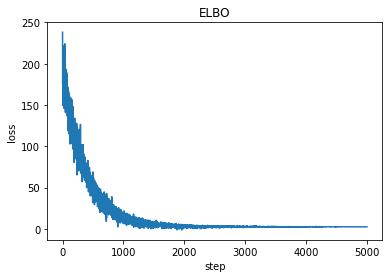

P(Temperature|Sensor=18.0) = 
Normal(loc: 17.439010620117188, scale: 0.8939886093139648)



In [18]:
#Run inference
svi(model, guide, obs, plot=True)

#Print results
print("P(Temperature|Sensor=18.0) = ")
print(dist.Normal(pyro.param("mean").item(), pyro.param("scale").item()))
print("")

---
* Inference is an **optimization procedure**. 

* The **ELBO function is minimized** during the variational inference process.

---

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


### 3.2  Learning from a bunch of observations

---
* Let us assume we have a **set of observations** about the temperature at different time steps. 

* In this case, and following a probabilistic modelling approach, we define a **set of random variables**.

* One random variable for each **observation**, using a standard ``for-loop``.

---

In [19]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1])}

def model(obs):
    for i in range(obs['sensor'].shape[0]):
        temp = pyro.sample(f'temp_{i}', dist.Normal(15.0, 2.0))
        sensor = pyro.sample(f'sensor_{i}', dist.Normal(temp, 1.0), obs=obs['sensor'][i])


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

---

* What if we do **not know the mean temperature**. 

* We can **infer it from the data** by, e.g., using a **maximum likelihood** approach,

$$ \mu_{t} = \arg\max_\mu \ln p(s_1,\ldots,s_n|\mu) = \arg\max_\mu \prod_i \int_{t_i} p(s_i|t_i)p(t_i|\mu) dt_i $$
where $s_i$ and $t_i$ denote the sensor reading and the real temperature at time $i$. 

* The graphical model:
<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/PGM-Tem_sensor4.png?raw=1" alt="Drawing" width="150">
</center>
* With PPLs, we do not have to care about the **underlying inference problem** We just define the model and let the **PPL's engine** make the work for us. 

* We use Pyro's parameters (defined as ``pyro.param``), which are free variables we can optimize. 



---

In [20]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1])}

def model(obs):
    # `mean_temp` is learnable
    mean_temp = pyro.param('mean_temp', torch.tensor(15.0))
    for i in range(obs['sensor'].shape[0]):
        temp = pyro.sample(f'temp_{i}', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample(f'sensor_{i}', dist.Normal(temp, 1.0), obs = obs['sensor'][i])

In [21]:
#@title
#Define the guide
def guide(obs):
    for i in range(obs['sensor'].shape[0]):
        mean_i = pyro.param(f'mean_{i}', obs['sensor'][i])
        scale_i = pyro.param(f'scale_{i}', torch.tensor(1.), constraint = constraints.positive)
        temp = pyro.sample(f'temp_{i}', dist.Normal(mean_i, scale_i))

Step: 0. Loss: 48.78990650177002
Step: 250. Loss: 25.413434386253357
Step: 500. Loss: 20.30023491382599
Step: 750. Loss: 18.34083443880081
Step: 1000. Loss: 18.529908418655396
Step: 1250. Loss: 18.344002544879913
Step: 1500. Loss: 18.898868143558502
Step: 1750. Loss: 18.467625558376312
Step: 2000. Loss: 17.920530676841736
Step: 2250. Loss: 18.483322203159332
Step: 2500. Loss: 17.548838436603546
Step: 2750. Loss: 18.01423716545105
Step: 3000. Loss: 17.85559320449829
Step: 3250. Loss: 18.019640266895294
Step: 3500. Loss: 17.139669597148895
Step: 3750. Loss: 16.54307270050049
Step: 4000. Loss: 17.670510947704315
Step: 4250. Loss: 16.972456634044647
Step: 4500. Loss: 17.145612597465515
Step: 4750. Loss: 17.377890169620514


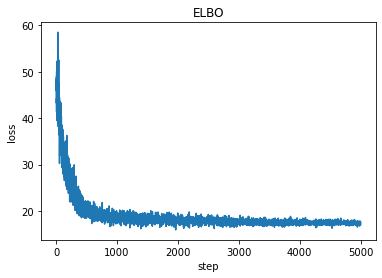

Estimated Mean Temperature
19.324594497680664


In [22]:
#@title
#Run inference
svi(model, guide, obs, num_steps=5000, plot = True)

In [24]:
#Print results
print("Estimated Mean Temperature (Maximum Likelihood Estimate)")
mean_temp_ml = pyro.param("mean_temp").item()
print(mean_temp_ml)

Estimated Mean Temperature (Maximum Likelihood Estimate)
19.324594497680664


In [25]:
# To get the name of all the parameters we can use the parameter store
param_store = pyro.get_param_store() #Basically works as a dictionary
print(param_store.get_all_param_names())
print("-" * 10)
print(param_store.get_param("scale_0"))

# Easier
print("-" * 10)
print(pyro.param("scale_0"))

dict_keys(['mean_0', 'scale_0', 'mean_1', 'scale_1', 'mean_2', 'scale_2', 'mean_3', 'scale_3', 'mean_4', 'scale_4', 'mean_5', 'scale_5', 'mean_6', 'scale_6', 'mean_7', 'scale_7', 'mean_8', 'scale_8', 'mean_9', 'scale_9', 'mean_temp'])
----------
tensor(0.8735, grad_fn=<AddBackward0>)
----------
tensor(0.8735, grad_fn=<AddBackward0>)


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

---
* Instead of performing *maximum likelihood* learning, we can perform **Bayesian learning**.

* We treat the unknown quantity as a **random variable**.

* This model can be graphically represented as follows:

<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/PGM-Tem-Sensor2.png?raw=1" alt="Drawing" width="150">
</center>
---
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

---

In [26]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1])}

def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    for i in range(obs['sensor'].shape[0]):
        temp = pyro.sample(f'temp_{i}', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample(f'sensor_{i}', dist.Normal(temp, 1.0), obs = obs['sensor'][i])

---
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

---
* We perform inference over this model:

 $$ p(\mu_t | s_1,\ldots, s_n)=\frac{p(\mu_t)\prod_{i=1}^n \int p(s_i|t_i)p(t_i|\mu_t)dt_i }{\int \prod_{i=1}^n p(s_i|\mu_t)p(\mu_t) d\mu} $$
---


In [27]:
#@title
#Define the guide
def guide(obs):
    mean = pyro.param("mean", torch.mean(obs['sensor']))
    scale = pyro.param("scale", torch.tensor(1.), constraint = constraints.positive)
    mean_temp = pyro.sample('mean_temp', dist.Normal(mean, scale))
    for i in range(obs['sensor'].shape[0]):
        mean_i = pyro.param(f'mean_{i}', obs['sensor'][i])
        scale_i = pyro.param(f'scale_{i}', torch.tensor(1.), constraint = constraints.positive)
        temp = pyro.sample(f'temp_{i}', dist.Normal(mean_i, scale_i))

Step: 0. Loss: 22.730609238147736
Step: 250. Loss: 23.135410010814667
Step: 500. Loss: 22.516603589057922
Step: 750. Loss: 23.012173414230347
Step: 1000. Loss: 23.379332721233368
Step: 1250. Loss: 21.344900250434875
Step: 1500. Loss: 21.547706425189972
Step: 1750. Loss: 22.216265946626663
Step: 2000. Loss: 21.890135407447815
Step: 2250. Loss: 20.29723846912384
Step: 2500. Loss: 22.3088219165802
Step: 2750. Loss: 21.060743868350983
Step: 3000. Loss: 20.52791166305542
Step: 3250. Loss: 21.107940018177032
Step: 3500. Loss: 20.697864294052124
Step: 3750. Loss: 19.537007689476013
Step: 4000. Loss: 20.411892294883728
Step: 4250. Loss: 21.04202163219452
Step: 4500. Loss: 22.162554025650024
Step: 4750. Loss: 21.761186361312866


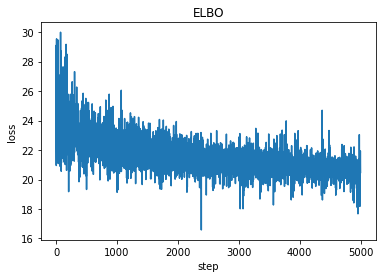

P(mean_temp|Sensor=[18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]) =
Normal(loc: 18.906660079956055, scale: 0.5859914422035217)

54.66743087768555 seconds


In [28]:
import time
        
#Run inference
start = time.time()
svi(model, guide, obs, num_steps=5000, plot = True)

#Print results
print("P(mean_temp|Sensor=[18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]) =")
print(dist.Normal(pyro.param("mean").item(), pyro.param("scale").item()))
print("")
end = time.time()
print(f"{(end - start)} seconds")

---
* The result of the learning is **not a point estimate**.

* We have a **posterior distribution** which captures **uncertainty** about the estimation.

---

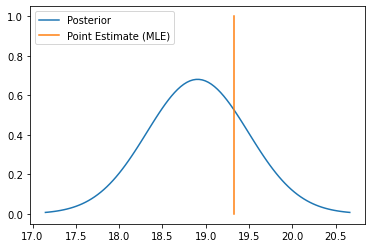

In [30]:
mu = pyro.param("mean").item()
scale = pyro.param("scale").item()
x = np.linspace(mu - 3*scale, mu + 3*scale, 100)
plt.plot(x, stats.norm.pdf(x, mu, scale), label='Posterior')
point = mean_temp_ml
plt.plot([point, point],[0., 1.], label='Point Estimate (MLE)')
plt.legend()
plt.show()

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


### 3.3 The use of ``plate`` construct

---

* Pyro can exploit **conditional independencies and vectorization** to make inference much faster. 

* This can be done with the construct **``plate``**. 

* With this construct, we can indicate that the variables $s_i$ and $t_i$ are **conditionally indepedendent** from another variables $s_j$ and $t_j$ given $\mu_t$. 

<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/PGM-Tem-Sensor2.png?raw=1" alt="Drawing" width="150">
</center>
---



In [34]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1])}

def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    # plate construct
    with pyro.plate('a', obs['sensor'].shape[0]):
        temp = pyro.sample('temp', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample('sensor', dist.Normal(temp, 1.0), obs=obs['sensor'])

---
* The ``plate`` construct reflects the standard notational use in graphical models denoting the **repetition of some parts of of the graph**. 
<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/PGM-Tem-Sensor3.png?raw=1" alt="Drawing" width="250">
</center>
* We can here make a distinction between **local** and **global** random variables: 

>* **Local random variables** caputure **specific information** about the $i$-th data sample (i.e. the real temperature at this moment in time).

>* **Global random variables** capture **common information** about all the data samples (i.e. the average temperature of all data samples). 

---

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


Observe how inference in this model is much **faster**. 

In [38]:
#@title
#Define the guide
def guide(obs_sensor):
    mean = pyro.param("mean", torch.mean(obs['sensor']))
    scale = pyro.param("scale", torch.tensor(1.), constraint = constraints.positive)
    mean_temp = pyro.sample('mean_temp', dist.Normal(mean, scale))
    
    # Notice here the part `as i`
    with pyro.plate('a', obs['sensor'].shape[0]) as i:
        mean_i = pyro.param('mean_i', obs['sensor'][i])
        scale_i = pyro.param('scale_i', torch.tensor(1.), constraint = constraints.positive)
        temp = pyro.sample('temp', dist.Normal(mean_i, scale_i))

In [39]:
#Run inference
start = time.time()
svi(model, guide, obs, num_steps=1000)

#Print results
print("P(mean_temp|Sensor=[18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]) =")
print(dist.Normal(pyro.param("mean").item(), pyro.param("scale").item()))
print("")
end = time.time()
print(f"{(end - start)} seconds")

Step: 0. Loss: 27.614915829602054
Step: 250. Loss: 25.363654078195673
Step: 500. Loss: 21.768937074970882
Step: 750. Loss: 23.097348544069035
P(mean_temp|Sensor=[18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]) =
Normal(loc: 17.746591567993164, scale: 0.6085163950920105)

6.705528497695923 seconds



<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


### **<span style="color:red">Exercise 1: </span>The role of *prior distributions* in learning**

In this case we just want to llustrate how the output of learning depends of the particular **prior** we introduce in the model. Play with different options and extract conclusions:

1. What happens if we change the mean of the prior?
2. What happens if we change the scale of the prior?
3. What happens to the posterior if the number of data samples deacreases and increases?

Step: 0. Loss: 1149.974737615655
Step: 250. Loss: 1103.271010603801
Step: 500. Loss: 1111.8308753467359
Step: 750. Loss: 1100.2123387452802
P(Temperature|Sensor=18.0) = 
Normal(loc: 18.05093002319336, scale: 0.09702174365520477)


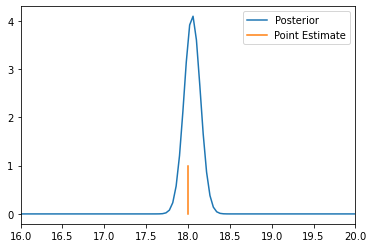

In [54]:
#The observatons   
sample_size = 500
obs = {'sensor': torch.tensor(np.random.normal(18, 2, sample_size))}

def model(obs):
    # Mean of the prior
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 5.0))
    with pyro.plate('a', obs['sensor'].shape[0]):
        #Prior
        temp = pyro.sample('temp', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample('sensor', dist.Normal(temp, 1.0), obs=obs['sensor'])

#Run inference
svi(model, guide, obs, num_steps=1000)

#Print results
print("P(Temperature|Sensor=18.0) = ")
print(dist.Normal(pyro.param("mean").item(), pyro.param("scale").item()))

x = np.linspace(16, 20, 100)
plt.plot(x, stats.norm.pdf(x, pyro.param("mean").item(), pyro.param("scale").item()), label='Posterior')
point = 18
plt.plot([point, point],[0., 1.], label='Point Estimate')
plt.xlim(16,20)
plt.legend()
plt.show()


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


# **4.  Icecream Shop**


* We have an ice-cream shop and we **record the ice-cream sales and the average temperature of the day** (using a temperature sensor).

* We know **temperature affects the sales** of ice-creams.

* We want to **precisely model** how temperature affects ice-cream sales.

<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/raw/main/Day1/Figures/Ice-cream_shop_-_Florida.jpg" alt="Drawing" width=300 >
</center>



<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


---
* We have **observations** from temperature and sales.

* Sales are modeled with a **Poisson** distribution:

>- The rate of the Poisson **linearly depends of the real temperature**.
---

Next figure provides a graphical and a probabilistic description of the model:
<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/Ice-Cream-Shop-Model.png?raw=1" alt="Drawing" width=700>
</center>



In [55]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]),
       'sales': torch.tensor([46., 47., 49., 44., 50., 54., 51., 52., 49., 53.])}

def model(obs):
    # Global random variables
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    alpha = pyro.sample('alpha', dist.Normal(0.0, 100.0))
    beta = pyro.sample('beta', dist.Normal(0.0, 100.0))
    
    # Local random variables
    with pyro.plate('a', obs['sensor'].shape[0]):
        temp = pyro.sample('temp', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample('sensor', dist.Normal(temp, 1.0), obs = obs['sensor'])
        # `torch.max` function is used to avoid nearly zero rates
        rate = torch.max(torch.tensor(0.001), alpha + beta * temp)
        sales = pyro.sample('sales', dist.Poisson(rate), obs = obs['sales'])

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


In [56]:
#@title
#Define the guide
def guide(obs):
    # `mean` and `scale` are learnable parameters to parametrize the posterior for `mean_temp`
    mean = pyro.param("mean", torch.mean(obs['sensor']))
    scale = pyro.param("scale", torch.tensor(1.), constraint = constraints.positive)
    mean_temp = pyro.sample('mean_temp', dist.Normal(mean, scale))
    
    # `alpha_mean` and `alpha_scale` are learnable parameters to parametrize the posterior for `alpha`
    alpha_mean = pyro.param("alpha_mean", torch.mean(obs['sensor']))
    alpha_scale = pyro.param("alpha_scale", torch.tensor(1.), constraint = constraints.positive)
    alpha = pyro.sample('alpha', dist.Normal(alpha_mean, alpha_scale))
    
    # `beta_mean` and `beta_scale` are learnable parameters to parametrize the posterior for `beta`
    beta_mean = pyro.param("beta_mean", torch.tensor(1.0))
    beta_scale = pyro.param("beta_scale", torch.tensor(1.), constraint = constraints.positive)
    beta = pyro.sample('beta', dist.Normal(beta_mean, beta_scale))

    with pyro.plate('a', obs['sensor'].shape[0]) as i:
        mean_i = pyro.param('mean_i', obs['sensor'][i])
        scale_i = pyro.param('scale_i', torch.tensor(1.), constraint = constraints.positive)
        temp = pyro.sample('temp', dist.Normal(mean_i, scale_i))  

---
* We run the **(variational) inference engine** and get the results.

* With PPLs, we only care about modeling, **not about the low-level details** of the machine-learning solver.

---

In [57]:
#Run inference
svi(model, guide, obs, num_steps=1000)

#Print results    
print("Posterior temperature mean")
print(dist.Normal(pyro.param("mean").item(), pyro.param("scale").item()))
print("")
print("Posterior alpha")
print(dist.Normal(pyro.param("alpha_mean").item(), pyro.param("alpha_scale").item()))
print("")
print("Posterior aeta")
print(dist.Normal(pyro.param("beta_mean").item(), pyro.param("beta_scale").item()))

Step: 0. Loss: 59.588271617889404
Step: 250. Loss: 61.99132990837097
Step: 500. Loss: 62.59643054008484
Step: 750. Loss: 64.6226726770401
Posterior temperature mean
Normal(loc: 19.29538345336914, scale: 0.6179718375205994)

Posterior alpha
Normal(loc: 19.771303176879883, scale: 1.8412442207336426)

Posterior aeta
Normal(loc: 1.4701026678085327, scale: 0.12041415274143219)


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


### <span style="color:red">Exercise 2: Introduce Humidity in the Icecream shop model </span> 
---
* Assume we also have a bunch of **humidity sensor measurements**.
* Assume the **sales are also linearly influenced by the humidity**.
* **Extend the above model** in order to integrate all of that.
---

Next figure provides a graphical and a probabilistic description of the model:
<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/Ice-Cream-Shop-Model-Humidity.png?raw=1" alt="Drawing" width=700>
</center>




In [62]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]),
       'sales': torch.tensor([46., 47., 49., 44., 50., 54., 51., 52., 49., 53.]),
       'sensor_humidity': torch.tensor([82.8, 87.6, 69.1, 74.2, 80.3, 94.2, 91.2, 92.2, 99.1, 93.2])}


def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    ## Introduce a random variable "mean_humidity"
    mean_humidity = pyro.sample("mean_humidity", dist.Normal(80.0, 5.0))

    alpha = pyro.sample('alpha', dist.Normal(0.0, 100.0))
    beta = pyro.sample('beta', dist.Normal(0.0, 100.0))
    
    ## Introduce a coefficient for the humidity "gamma"
    gamma = pyro.sample("gamma", dist.Normal(0.0, 100.0))

    with pyro.plate('a', obs['sensor'].shape[0]):
        temp = pyro.sample('temp', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample('sensor', dist.Normal(temp, 1.0), obs=obs['sensor'])
        #Add the 'humidity' variable and the 'sensor_humidity' variable
        humidity = pyro.sample("humidity", dist.Normal(mean_humidity, 2.0))
        sensor_humidity = pyro.sample("sensor_humidity", dist.Normal(humidity, 1.0), obs = obs["sensor_humidity"])
        
        #Add the linear dependency for the rate with respect to temp and humidity (keep torch.max to avoid numerical stability issues)
        rate = torch.max(torch.tensor(0.001), alpha + beta * temp + gamma * humidity)
        sales = pyro.sample('sales', dist.Poisson(rate), obs=obs['sales'])

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

---
* We run the **(variational) inference engine** and get the results.

* With PPLs, we only care about modeling, **not about the low-level details** of the machine-learning solver.

---

In [63]:
#@title
#Auxiliary Guide Code
def guide(obs):
    # Posterior for `mean_temp`
    mean = pyro.param("mean", torch.mean(obs['sensor']))
    scale = pyro.param("scale", torch.tensor(1.), constraint = constraints.positive)
    mean_temp = pyro.sample('mean_temp', dist.Normal(mean, scale))
    
    # Posterior for `mean_humidity`
    meanH = pyro.param("meanH", torch.mean(obs['sensor_humidity']))
    scaleH = pyro.param("scaleH", torch.tensor(1.), constraint = constraints.positive)
    mean_humidity = pyro.sample('mean_humidity', dist.Normal(meanH, scaleH))
    
    # Posterior for `alpha`
    alpha_mean = pyro.param("alpha_mean", torch.mean(obs['sensor']), constraint = constraints.positive)
    alpha_scale = pyro.param("alpha_scale", torch.tensor(1.), constraint = constraints.positive)
    alpha = pyro.sample('alpha', dist.Normal(alpha_mean, alpha_scale))
    
    # Posterior for `beta`
    beta_mean = pyro.param("beta_mean", torch.tensor(1.0), constraint = constraints.positive)
    beta_scale = pyro.param("beta_scale", torch.tensor(1.), constraint = constraints.positive)
    beta = pyro.sample('beta', dist.Normal(beta_mean, beta_scale))
    
    # Posterior for `gamma`
    gamma_mean = pyro.param("gamma_mean", torch.tensor(1.0), constraint = constraints.positive)
    gamma_scale = pyro.param("gamma_scale", torch.tensor(1.), constraint = constraints.positive)
    gamma = pyro.sample('gamma', dist.Normal(gamma_mean, gamma_scale))

    with pyro.plate('a', obs['sensor'].shape[0]) as i:
        # Posterior for `temp`
        mean_i = pyro.param('mean_i', obs['sensor'][i])
        scale_i = pyro.param('scale_i', torch.tensor(1.), constraint=constraints.positive)
        temp = pyro.sample('temp', dist.Normal(mean_i, scale_i))
        
        # Posterior for `humidity`
        meanH_i = pyro.param('meanH_i', obs['sensor_humidity'][i])
        scaleH_i = pyro.param('scaleH_i', torch.tensor(1.), constraint=constraints.positive)
        humidity = pyro.sample('humidity', dist.Normal(meanH_i, scaleH_i)) 

In [64]:
#Run inference
svi(model, guide, obs, num_steps = 1000)

#Print results    
print("Posterior Temperature Mean")
print(dist.Normal(pyro.param("mean").item(), pyro.param("scale").item()))
print("")
print("Posterior Humidity Mean")
print(dist.Normal(pyro.param("meanH").item(), pyro.param("scaleH").item()))
print("")
print("Posterior Alpha")
print(dist.Normal(pyro.param("alpha_mean").item(), pyro.param("alpha_scale").item()))
print("")
print("Posterior Beta")
print(dist.Normal(pyro.param("beta_mean").item(), pyro.param("beta_scale").item()))
print("")
print("Posterior Gamma")
print(dist.Normal(pyro.param("gamma_mean").item(), pyro.param("gamma_scale").item()))

Step: 0. Loss: 225.9860978126526
Step: 250. Loss: 189.4837949872017
Step: 500. Loss: 181.71267437934875
Step: 750. Loss: 173.74161976575851
Posterior Temperature Mean
Normal(loc: 19.280193328857422, scale: 0.6474274396896362)

Posterior Humidity Mean
Normal(loc: 86.28569030761719, scale: 0.652188777923584)

Posterior Alpha
Normal(loc: 14.803262710571289, scale: 1.8396451473236084)

Posterior Beta
Normal(loc: 0.8328640460968018, scale: 0.11642642319202423)

Posterior Gamma
Normal(loc: 0.20705710351467133, scale: 0.02703937329351902)


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

# 5.  **Temporal Models**

If we think there is a temporal dependency between the variables, we can easily encode that with PPLs. 

---
* Let us assume that there is a **temporal dependency** between the variables.

* E.g. the current **real temperature must be similar to the real temperature in the previous time step**.

* This temporal dependency can **be modeled** using a **for-loop** in Pyro

* Consider the **graphical representation**.
---


<img src="https://github.com/PGM-Lab/probai-2021-pyro/raw/main/Day1/Figures/tempmodel-temporal-III.png" alt="Drawing" style="width: 350px;" >



In [83]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1])}

# Even when a random variable `theta` appears in the picture
# in this model is not considered
def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    for i in range(obs['sensor'].shape[0]):
        if i == 0:
            temp = pyro.sample(f'temp_{i}', dist.Normal(mean_temp, 2.0))
        else:
            temp = pyro.sample(f'temp_{i}', dist.Normal(prev_temp, 2.0))
        sensor = pyro.sample(f'sensor_{i}', dist.Normal(temp, 1.0), obs = obs['sensor'][i])
        prev_temp = temp

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

---
* We run the **(variational) inference engine** and get the results.

* With PPLs, we only care about modeling, **not about the low-level details** of the machine-learning solver.

---

In [84]:
#@title
#Define the guide
def guide(obs):
    # Posterior for `mean_temp`
    mean = pyro.param("mean", torch.mean(obs['sensor']))
    scale = pyro.param("scale", torch.tensor(1.), constraint = constraints.positive)
    mean_temp = pyro.sample('mean_temp', dist.Normal(mean, scale))
    
    for i in range(obs['sensor'].shape[0]):
        mean_i = pyro.param(f'mean_{i}', obs['sensor'][i])
        scale_i = pyro.param(f'scale_{i}', torch.tensor(1.), constraint = constraints.positive)
        temp = pyro.sample(f'temp_{i}', dist.Normal(mean_i, scale_i))

In [85]:
import time
        
#Run inference
svi(model, guide, obs, num_steps = 2000)

smooth_temp = []
for i in range(obs['sensor'].shape[0]):
    smooth_temp.append(pyro.param(f'mean_{i}').item())

print('Finished')

Step: 0. Loss: 27.260587334632874
Step: 250. Loss: 22.9715935587883
Step: 500. Loss: 25.857170820236206
Step: 750. Loss: 21.623638093471527
Step: 1000. Loss: 21.87017470598221
Step: 1250. Loss: 20.415920794010162
Step: 1500. Loss: 19.285376250743866
Step: 1750. Loss: 18.978263318538666
Finished


# A HUGE WARNING
dictionary `obs` is modified after inference

In [88]:
# AND NOW LET'S PRINT THE DICTIONARY `obs` defined above
print(obs)
print('Somewhere during the inference process it gets modified')
print('Not cool!')

{'sensor': tensor([18.3548, 18.6558, 18.8544, 18.9672, 20.1754, 21.1760, 20.8995, 20.6034,
        20.0766, 20.0708])}
Somewhere during the inference process it gets modified
Not cool!


---
* Plot the **observed measurements** of the temperature **against** the inferred **real temperature**.

* By querying the **local hidden** we can **smooth** the temperature.

* The **recovered temperature** is much less noisy than the measured one. 
---


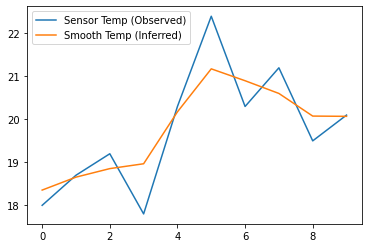

In [90]:
# HARD-CODED DUE TO THE MODIFICATION OF `obs` AFTER INFERENCE
plt.plot([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1], label = 'Sensor Temp (Observed)')
plt.plot(smooth_temp, label = 'Smooth Temp (Inferred)')
plt.legend()

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

### <span style="color:red">Exercise 3:  Temporal Extension of the Iceacream shop model </span> 

--- 
* **Extends** Excersise 2.
* Assume temperature depends of the **temperature in the previous day**.
* Assume humidity depends of the **humidity in the previous day**.
* Assume sales depends on the **current temperature and humidity**.
* Use the following **graphical representation for reference**.
* Consider here that the plate representation has to be coded in Pyro using a **``for-loop``**.

---

<img src="https://github.com/PGM-Lab/probai-2021-pyro/raw/main/Day1/Figures/icecream-model-temporal.png" alt="Drawing" width=500 >




In [95]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]),
       'sales': torch.tensor([46., 47., 49., 44., 50., 54., 51., 52., 49., 53.]),
       'sensor_humidity': torch.tensor([82.8, 87.6, 69.1, 74.2, 80.3, 94.2, 91.2, 92.2, 99.1, 93.2])}

def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    ## Introduce a random variable "mean_humidity"
    mean_humidity = pyro.sample('mean_humidity', dist.Normal(80.0, 5.0))

    alpha = pyro.sample('alpha', dist.Normal(0.0, 100.0))
    beta = pyro.sample('beta', dist.Normal(0.0, 100.0))
    ## Introduce a coefficient for the humidity "gamma"
    gamma = pyro.sample('gamma', dist.Normal(0.0, 100.0))

    for i in range(obs['sensor'].shape[0]):
        if i == 0:
            temp = pyro.sample(f'temp_{i}', dist.Normal(mean_temp, 2.0))
            #Introduce the 'humidity' variable at time 0.
            humidity = pyro.sample(f'humidity_{i}', dist.Normal(mean_humidity, 2.0))
        else:
            temp = pyro.sample(f'temp_{i}', dist.Normal(prev_temp, 2.0))
            #Introduce the f'humidity_{i}' variable defining the transition
            humidity = pyro.sample(f'humidity_{i}', dist.Normal(prev_humidity, 2.0))
            
        sensor = pyro.sample(f'sensor_{i}', dist.Normal(temp, 1.0), obs = obs['sensor'][i])
        #Introduce the f'sensor_humidity_{i}' variable. 
        sensor_humidity = pyro.sample(f'sensor_humidity_{i}', dist.Normal(humidity, 1.0), obs = obs['sensor_humidity'][i])

        #Add the linear dependency for the rate with respect to temp and humidity (keep torch.max to avoid numerical stability issues)
        rate = torch.max(torch.tensor(0.01), alpha + beta * temp + gamma * humidity)
        sales = pyro.sample(f'sales_{i}', dist.Poisson(rate), obs = obs['sales'][i])
        prev_temp = temp
        #Keep humidity for the next time step. 
        prev_humidity = humidity

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

---
* We run the **(variational) inference engine** and get the results.

* With PPLs, we only care about modeling, **not about the low-level details** of the machine-learning solver.

---

In [96]:
#@title
#Define the guide
def guide(obs):
    mean = pyro.param("mean", torch.mean(obs['sensor']))
    scale = pyro.param("scale", torch.tensor(1.), constraint=constraints.greater_than(0.01))
    mean_temp = pyro.sample('mean_temp', dist.Normal(mean, scale))

    meanH = pyro.param("meanH", torch.mean(obs['sensor_humidity']), constraint=constraints.positive)
    scaleH = pyro.param("scaleH", torch.tensor(1.), constraint=constraints.greater_than(0.01))
    humidity_mean = pyro.sample('mean_humidity', dist.Normal(meanH, scaleH))


    alpha_mean = pyro.param("alpha_mean", torch.mean(obs['sensor']))
    alpha_scale = pyro.param("alpha_scale", torch.tensor(1.), constraint=constraints.greater_than(0.01))
    alpha = pyro.sample('alpha', dist.Normal(alpha_mean, alpha_scale))

    beta_mean = pyro.param("beta_mean", torch.tensor(0.0))
    beta_scale = pyro.param("beta_scale", torch.tensor(1.), constraint=constraints.greater_than(0.01))
    beta = pyro.sample('beta', dist.Normal(beta_mean, beta_scale))

    gamma_mean = pyro.param("gamma_mean", torch.tensor(0.0))
    gamma_scale = pyro.param("gamma_scale", torch.tensor(1.), constraint=constraints.greater_than(0.01))
    gamma = pyro.sample('gamma', dist.Normal(gamma_mean, gamma_scale))

    for i in range(obs['sensor'].shape[0]):
        mean_i = pyro.param(f'mean_{i}', obs['sensor'][i])
        scale_i = pyro.param(f'scale_{i}', torch.tensor(1.), constraint=constraints.greater_than(0.01))
        temp = pyro.sample(f'temp_{i}', dist.Normal(mean_i, scale_i))
        meanH_i = pyro.param(f'meanH_{i}', obs['sensor_humidity'][i])
        scaleH_i = pyro.param(f'scaleH_{i}', torch.tensor(1.), constraint=constraints.greater_than(0.01))
        humidity_i = pyro.sample(f'humidity_{i}', dist.Normal(meanH_i, scaleH_i))

In [97]:
import time
        
#Run inference
svi(model, guide, obs, num_steps=2000)

smooth_temp=[]
smooth_humidity=[]

for i in range(obs['sensor'].shape[0]):
    smooth_temp.append(pyro.param(f'mean_{i}').item())
    smooth_humidity.append(pyro.param(f'meanH_{i}').item())

print('Finished')

Step: 0. Loss: 211.0501967072487
Step: 250. Loss: 154.10122632980347
Step: 500. Loss: 130.0249564051628
Step: 750. Loss: 114.7251324057579
Step: 1000. Loss: 122.69076371192932
Step: 1250. Loss: 134.14074671268463
Step: 1500. Loss: 111.70880776643753
Step: 1750. Loss: 101.93360096216202
Finished


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

---
* We can plot the observered measurements of the temperature against the **inferred real temperature** by our model. 

* The **recovered temperature** is much less noisy than the real one.

---


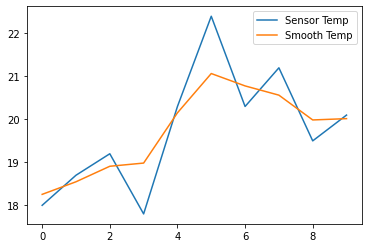

In [98]:
plt.plot([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1], label='Sensor Temp')
plt.plot(smooth_temp, label='Smooth Temp')
plt.legend()

---
* We can plot the observered measurements of the humidity against the **inferred real humidity** by our model. 

* The **recovered humidity** is much less noisy than the real one.

---


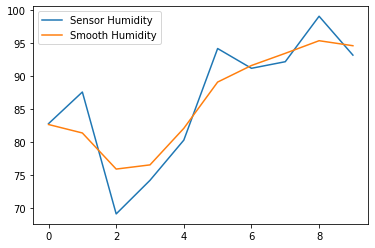

In [99]:
humidity = torch.tensor([82.8, 87.6, 69.1, 74.2, 80.3, 94.2, 91.2, 92.2, 99.1, 93.2])
plt.plot(humidity.detach().numpy(), label='Sensor Humidity')
plt.plot(smooth_humidity, label='Smooth Humidity')
plt.legend()

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>
